## EDA

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
milkdata = pd.read_csv("milknew.csv")

In [3]:
milkdata.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
milkdata['Grade'] = milkdata['Grade'].map({'low': 0, 'medium': 1, 'high': 2})

In [5]:
milkdata.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [6]:
X = milkdata.drop(columns=['Grade'])
y = milkdata['Grade']

In [7]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=572)
y_train = np.array(y_train)

In [9]:
print(milkdata.count())

pH            1059
Temprature    1059
Taste         1059
Odor          1059
Fat           1059
Turbidity     1059
Colour        1059
Grade         1059
dtype: int64


In [10]:
print(milkdata.duplicated().sum())  # Count duplicate rows

976


In [11]:
milkdata_nodup = milkdata.drop_duplicates()
X_nodup = milkdata_nodup.drop(columns=['Grade'])
y_nodup = milkdata_nodup['Grade']

# Standardization
scaler = StandardScaler()
X_scaled_nodup = scaler.fit_transform(X_nodup)

# Split the data into training and testing sets
X_train_nodup, X_test_nodup, y_train_nodup, y_test_nodup = train_test_split(X_scaled_nodup, y_nodup, test_size=0.3, random_state=572)
y_train_nodup = np.array(y_train_nodup)

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

predictions = log_reg_model.predict(X_test)

#accuracy = accuracy_score(y_test, predictions)

kf = KFold(n_splits=5, shuffle=True, random_state=572)
cv_scores = cross_val_score(log_reg_model, X_scaled, y, cv=kf, scoring='accuracy')

cv_results = {
    "Cross-Validation Scores": cv_scores,
    "Mean Accuracy": np.mean(cv_scores),
    "Standard Deviation": np.std(cv_scores)
}

cv_results

{'Cross-Validation Scores': array([0.85849057, 0.84433962, 0.85377358, 0.84433962, 0.85308057]),
 'Mean Accuracy': 0.850804792989359,
 'Standard Deviation': 0.005597514506006755}

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       131
           1       0.94      0.83      0.88       106
           2       0.76      0.88      0.81        81

    accuracy                           0.86       318
   macro avg       0.86      0.86      0.86       318
weighted avg       0.87      0.86      0.87       318



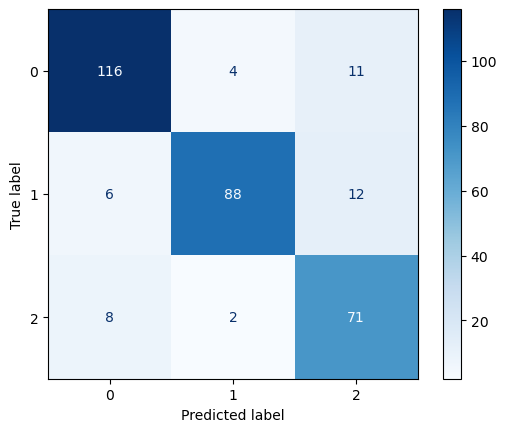

In [13]:
classes = ['0', '1', '2']
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues')

report = classification_report(y_test, predictions, target_names=['0', '1', '2'])

print(report)

In [14]:
log_reg_model_nodup = LogisticRegression()
log_reg_model_nodup.fit(X_train_nodup, y_train_nodup)

predictions = log_reg_model.predict(X_test_nodup)

kf = KFold(n_splits=5, shuffle=True, random_state=572)
cv_scores = cross_val_score(log_reg_model_nodup, X_scaled_nodup, y_nodup, cv=kf, scoring='accuracy')

cv_results = {
    "Cross-Validation Scores": cv_scores,
    "Mean Accuracy": np.mean(cv_scores),
    "Standard Deviation": np.std(cv_scores)
}

cv_results

{'Cross-Validation Scores': array([0.64705882, 0.47058824, 0.88235294, 0.875     , 0.75      ]),
 'Mean Accuracy': 0.725,
 'Standard Deviation': 0.15406824533775051}

## Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=572)
decision_tree_model.fit(X_train, y_train)
dt_predictions = decision_tree_model.predict(X_test)
#dt_accuracy = accuracy_score(y_test, dt_predictions)

kf = KFold(n_splits=5, shuffle=True, random_state=572)
cv_scores = cross_val_score(decision_tree_model, X_scaled, y, cv=kf, scoring='accuracy')

cv_results = {
    "Cross-Validation Scores": cv_scores,
    "Mean Accuracy": np.mean(cv_scores),
    "Standard Deviation": np.std(cv_scores)
}

cv_results

{'Cross-Validation Scores': array([0.99528302, 1.        , 0.99056604, 0.99056604, 0.98578199]),
 'Mean Accuracy': 0.99243941697219,
 'Standard Deviation': 0.004828849012690098}

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       131
           1       1.00      1.00      1.00       106
           2       0.98      0.99      0.98        81

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



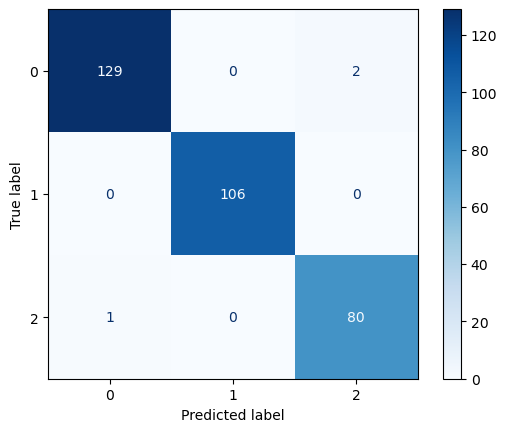

In [16]:
classes = ['0', '1', '2']
cm = confusion_matrix(y_test, dt_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues')

report = classification_report(y_test, dt_predictions, target_names=['0', '1', '2'])

print(report)

In [17]:
decision_tree_model_nodup = DecisionTreeClassifier(random_state=572)
decision_tree_model_nodup.fit(X_train_nodup, y_train_nodup)
dt_predictions_nodup = decision_tree_model_nodup.predict(X_test_nodup)
#dt_accuracy = accuracy_score(y_test, dt_predictions)

kf = KFold(n_splits=5, shuffle=True, random_state=572)
cv_scores = cross_val_score(decision_tree_model_nodup, X_scaled_nodup, y_nodup, cv=kf, scoring='accuracy')

cv_results = {
    "Cross-Validation Scores": cv_scores,
    "Mean Accuracy": np.mean(cv_scores),
    "Standard Deviation": np.std(cv_scores)
}

cv_results

{'Cross-Validation Scores': array([0.82352941, 0.76470588, 0.88235294, 0.75      , 0.8125    ]),
 'Mean Accuracy': 0.8066176470588236,
 'Standard Deviation': 0.0469437932338599}

## KNN - SK LEARN

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_accuracy

kf = KFold(n_splits=5, shuffle=True, random_state=572)
cv_scores = cross_val_score(knn_model, X_scaled, y, cv=kf, scoring='accuracy')

cv_results = {
    "Cross-Validation Scores": cv_scores,
    "Mean Accuracy": np.mean(cv_scores),
    "Standard Deviation": np.std(cv_scores)
}

cv_results

{'Cross-Validation Scores': array([0.99528302, 0.99528302, 0.99528302, 0.99056604, 1.        ]),
 'Mean Accuracy': 0.9952830188679244,
 'Standard Deviation': 0.0029832808114796023}

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       131
           1       1.00      1.00      1.00       106
           2       0.98      1.00      0.99        81

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



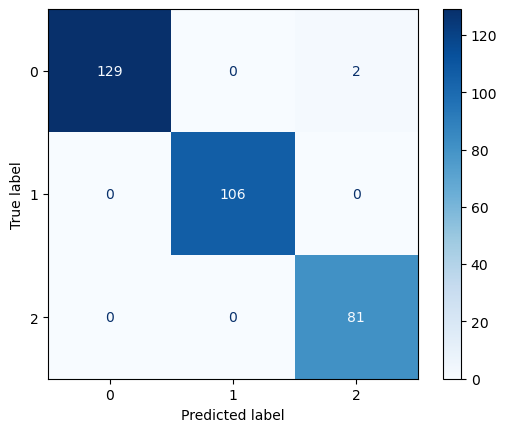

In [19]:
classes = ['0', '1', '2']
cm = confusion_matrix(y_test, knn_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues')

report = classification_report(y_test, knn_predictions, target_names=['0', '1', '2'])

print(report)

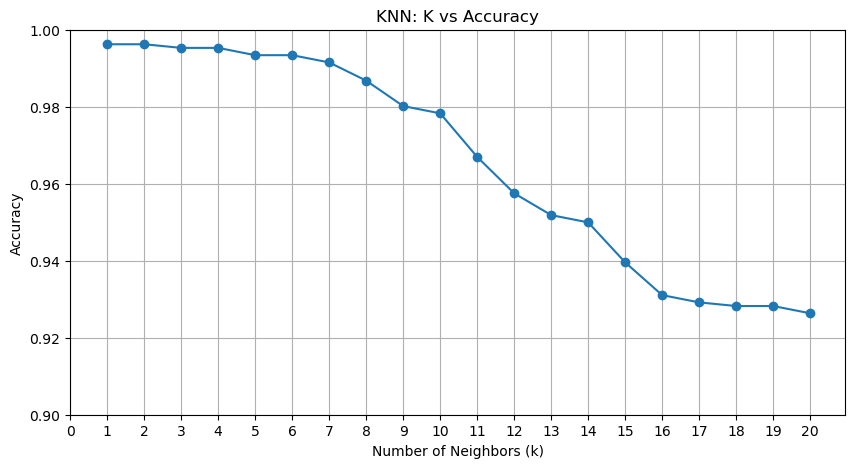

[0.9962264150943396,
 0.9962264150943396,
 0.9952830188679244,
 0.9952830188679244,
 0.9933872842707681,
 0.9933872842707681,
 0.991500491817938,
 0.9867700974693732,
 0.9801663238844676,
 0.9782795314316373,
 0.9669587767146561,
 0.9575114012340158,
 0.9518465528033623,
 0.949959760350532,
 0.9395734597156398,
 0.9310650093892516,
 0.9291782169364214,
 0.9282348207100062,
 0.9282348207100062,
 0.9263480282571761]

In [20]:
k_values = list(range(1, 21))
accuracies_sk = []

for k in k_values:
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='accuracy')
    accuracies_sk.append(np.mean(scores))

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies_sk, marker='o')
plt.ylim(0.9, 1)
plt.xticks(range(0, 21, 1))
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN: K vs Accuracy")
plt.grid(True)
plt.show()

accuracies_sk

## KNN Without Duplicates

In [21]:
kf = KFold(n_splits=5, shuffle=True, random_state=572)

knn = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn, X_scaled_nodup, y_nodup, cv=kf, scoring='accuracy')

cv_results = {
    "Cross-Validation Scores": cv_scores,
    "Mean Accuracy": np.mean(cv_scores),
    "Standard Deviation": np.std(cv_scores)
}

cv_results

{'Cross-Validation Scores': array([0.58823529, 0.70588235, 0.94117647, 0.8125    , 0.6875    ]),
 'Mean Accuracy': 0.7470588235294118,
 'Standard Deviation': 0.12035935955515029}

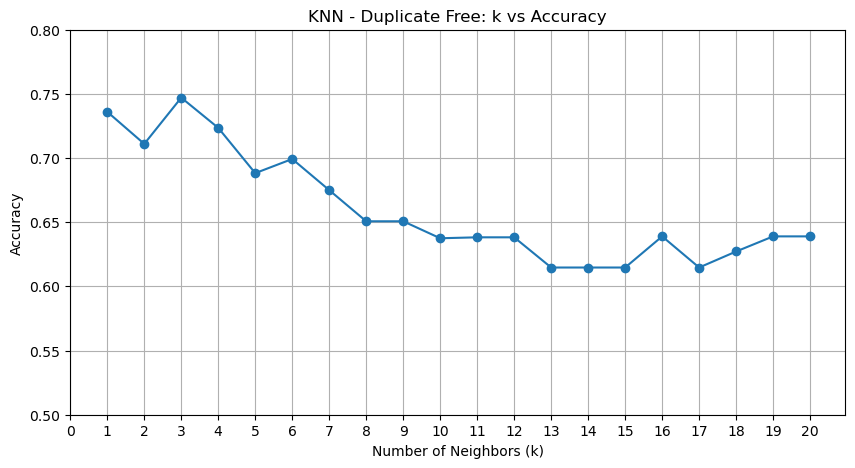

(3, 0.7470588235294118)

In [23]:
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled_nodup, y_nodup, cv=kf, scoring='accuracy')
    accuracy_scores.append(np.mean(scores))

    knn = KNeighborsClassifier(k)
    knn.fit(X_train_nodup, y_train)
    preds = knn.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies_sk.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.ylim(0.5, 0.8)
plt.xticks(range(0, 21, 1))
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN - No Duplicate: k vs Accuracy")
plt.grid(True)
plt.show()

optimal_k = k_values[np.argmax(accuracy_scores)]
optimal_k, max(accuracy_scores)